In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from catboost import CatBoostRegressor

In [23]:
pd.set_option('display.max_columns', 100)

In [24]:
weather = pd.read_csv("df_weather.csv",sep=",")
weather

,month,date,year,Time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,moonrise,moonset,sunrise,sunset,Bulan,Jam,Baseline
0,1,1,2014,00:00:00,-3,-6,0.0,8.7,2,1,-12,-11,-5,-11,28,3,58,0.0,1022,-4,10,273,20,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,12pm,0.3548
1,1,1,2014,07:00:00,-3,-6,0.0,8.7,2,1,-14,-13,-5,-13,24,13,52,0.0,1027,-5,10,262,18,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,7am,0.0079
2,1,1,2014,08:00:00,-3,-6,0.0,8.7,2,1,-14,-12,-5,-12,26,11,49,0.0,1027,-5,10,266,20,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,8am,0.1019
3,1,1,2014,09:00:00,-3,-6,0.0,8.7,2,1,-14,-11,-4,-11,27,9,46,0.0,1028,-4,10,270,22,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,9am,0.3932
4,1,1,2014,10:00:00,-3,-6,0.0,8.7,2,1,-14,-10,-4,-10,25,15,46,0.0,1028,-4,10,273,21,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,10am,0.5447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18937,9,30,2017,14:00:00,15,11,0.0,7.3,4,65,9,13,14,13,23,90,70,0.2,1023,14,10,58,17,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,2pm,0.1846
18938,9,30,2017,15:00:00,15,11,0.0,7.3,4,65,10,13,14,13,23,95,75,0.2,1024,14,10,55,17,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,3pm,0.0711
18939,9,30,2017,16:00:00,15,11,0.0,7.3,4,65,9,12,14,12,23,87,76,0.1,1024,14,10,50,17,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,4pm,0.0560
18940,9,30,2017,17:00:00,15,11,0.0,7.3,4,65,9,12,13,12,23,78,78,0.2,1025,13,10,46,16,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,5pm,0.0182


In [25]:
solar = pd.read_csv("df_solar.csv",sep=",")
solar

,year,month,date,Time,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,2014,1,1,00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Probably Clear,-6,124.02,0.120,3.5,78.43,-3,1010
1,2014,1,1,01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Probably Clear,-5,135.09,0.120,3.8,81.74,-3,1010
2,2014,1,1,02:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Probably Clear,-5,145.77,0.120,4.2,81.25,-3,1010
3,2014,1,1,03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Probably Clear,-6,155.07,0.120,4.5,74.14,-3,1010
4,2014,1,1,04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Probably Clear,-8,160.55,0.120,4.6,72.80,-4,1010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,12,31,19:00:00,63.998266,200.267662,175.805309,49.084399,319.043051,232.203921,Clear,-13,75.29,0.866,4.8,67.82,-9,1010
35060,2017,12,31,20:00:00,63.998266,200.267662,175.805309,49.084399,319.043051,232.203921,Clear,-13,83.05,0.866,4.8,73.91,-10,1010
35061,2017,12,31,21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Super-Cooled Water,-13,92.18,0.866,4.8,79.66,-11,1010
35062,2017,12,31,22:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Probably Clear,-13,102.27,0.866,4.9,85.39,-12,1010


In [26]:
test = pd.read_csv("df_test.csv",sep=",")
test

,month,date,year,Time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,moonrise,moonset,sunrise,sunset,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,9,0,3,6,21,9,0.0,11.6,5,71,7,9,11,9,20,0,77,0.0,1027,11,10,337,14,422,213,94,74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,8,133.20,0.126,2.7,96.31,9,1020
1,9,0,3,7,21,9,0.0,11.6,5,71,6,11,12,11,17,0,68,0.0,1027,12,10,340,13,422,213,94,74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,8,124.69,0.126,2.7,95.77,9,1020
2,9,0,3,8,21,9,0.0,11.6,5,71,6,13,14,13,15,0,60,0.0,1027,14,10,344,12,422,213,94,74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,8,114.68,0.126,2.8,95.30,9,1020
3,9,0,3,9,21,9,0.0,11.6,5,71,5,15,15,15,13,0,52,0.0,1027,15,10,348,11,422,213,94,74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,8,103.89,0.126,2.8,94.95,9,1020
4,9,0,3,10,21,9,0.0,11.6,5,71,5,17,17,17,9,0,48,0.0,1027,17,10,233,8,422,213,94,74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,8,92.80,0.126,2.8,94.59,9,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,11,30,3,12,-9,-13,0.2,8.7,1,88,-16,-18,-9,-18,29,22,56,0.0,1020,-9,10,297,26,411,528,185,10,16.000000,229.000000,24.000000,16.000000,229.000000,24.000000,6,-14,87.99,0.866,5.2,80.91,-12,1010
1073,11,30,3,13,-9,-13,0.2,8.7,1,88,-16,-18,-10,-18,30,29,58,0.0,1020,-10,10,299,26,411,528,185,10,51.000000,658.000000,172.000000,51.000000,658.000000,172.000000,6,-14,79.41,0.866,5.3,78.51,-12,1010
1074,11,30,3,14,-9,-13,0.2,8.7,1,88,-16,-19,-10,-19,30,37,59,0.0,1021,-10,10,301,26,411,528,185,10,63.998266,200.267662,175.805309,49.084399,319.043051,232.203921,1,-15,72.41,0.866,5.2,72.04,-11,1010
1075,11,30,3,15,-9,-13,0.2,8.7,1,88,-16,-19,-10,-19,31,44,61,0.0,1021,-10,10,304,26,411,528,185,10,63.998266,200.267662,175.805309,49.084399,319.043051,232.203921,6,-14,67.54,0.866,5.1,67.14,-10,1010


In [27]:
data = pd.merge(weather, solar, on=['Time', 'date', 'month', 'year'])
data

,month,date,year,Time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,moonrise,moonset,sunrise,sunset,Bulan,Jam,Baseline,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,1,1,2014,00:00:00,-3,-6,0.0,8.7,2,1,-12,-11,-5,-11,28,3,58,0.0,1022,-4,10,273,20,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,12pm,0.3548,0.0,0.0,0.0,0.0,0.0,0.0,Probably Clear,-6,124.02,0.120,3.5,78.43,-3,1010
1,1,1,2014,07:00:00,-3,-6,0.0,8.7,2,1,-14,-13,-5,-13,24,13,52,0.0,1027,-5,10,262,18,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,7am,0.0079,0.0,0.0,0.0,0.0,0.0,0.0,Probably Clear,-9,141.17,0.120,4.4,69.95,-5,1020
2,1,1,2014,08:00:00,-3,-6,0.0,8.7,2,1,-14,-12,-5,-12,26,11,49,0.0,1027,-5,10,266,20,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,8am,0.1019,0.0,0.0,0.0,0.0,0.0,0.0,Super-Cooled Water,-9,130.24,0.120,4.3,74.24,-6,1020
3,1,1,2014,09:00:00,-3,-6,0.0,8.7,2,1,-14,-11,-4,-11,27,9,46,0.0,1028,-4,10,270,22,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,9am,0.3932,0.0,0.0,0.0,0.0,0.0,0.0,Super-Cooled Water,-10,119.14,0.120,4.3,73.07,-6,1020
4,1,1,2014,10:00:00,-3,-6,0.0,8.7,2,1,-14,-10,-4,-10,25,15,46,0.0,1028,-4,10,273,21,6:58 AM,5:05 PM,7:12 AM,4:22 PM,Jan,10am,0.5447,0.0,0.0,0.0,0.0,0.0,0.0,Super-Cooled Water,-10,108.20,0.120,4.1,72.43,-6,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18937,9,30,2017,14:00:00,15,11,0.0,7.3,4,65,9,13,14,13,23,90,70,0.2,1023,14,10,58,17,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,2pm,0.1846,12.0,0.0,12.0,142.0,717.0,573.0,Overlapping,11,53.08,0.126,2.9,91.08,13,1010
18938,9,30,2017,15:00:00,15,11,0.0,7.3,4,65,10,13,14,13,23,95,75,0.2,1024,14,10,55,17,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,3pm,0.0711,19.0,0.0,19.0,149.0,760.0,664.0,Overlapping,11,47.39,0.126,3.1,89.13,13,1010
18939,9,30,2017,16:00:00,15,11,0.0,7.3,4,65,9,12,14,12,23,87,76,0.1,1024,14,10,50,17,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,4pm,0.0560,111.0,0.0,111.0,144.0,789.0,700.0,Overlapping,10,45.19,0.126,3.2,87.42,13,1010
18940,9,30,2017,17:00:00,15,11,0.0,7.3,4,65,9,12,13,12,23,78,78,0.2,1025,13,10,46,16,2:48 PM,12:05 AM,5:40 AM,5:26 PM,Sep,5pm,0.0182,113.0,0.0,113.0,129.0,804.0,678.0,Overlapping,10,46.99,0.126,3.3,85.41,13,1010


In [28]:
data = data.drop(["Bulan","Jam"],axis=1)

**Pre-processing Data**

1. Missing Value

In [29]:
data.isna().sum()

month                 0
date                  0
year                  0
Time                  0
maxtempC              0
mintempC              0
totalSnow_cm          0
sunHour               0
uvIndex               0
moon_illumination     0
DewPointC             0
FeelsLikeC            0
HeatIndexC            0
WindChillC            0
WindGustKmph          0
cloudcover            0
humidity              0
precipMM              0
pressure              0
tempC                 0
visibility            0
winddirDegree         0
windspeedKmph         0
moonrise              0
moonset               0
sunrise               0
sunset                0
Baseline              0
DHI                   0
DNI                   0
GHI                   0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Solar Zenith Angle    0
Surface Albedo        0
Wind Speed            0
Relative Humidity     0
Temperature           0
Pressure        

2. Encoding Variables

In [30]:
# Membuat salinan DataFrame agar asli tidak berubah
df_encoded = data.copy()

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom ke-1, 3, dan 4
df_encoded['date'] = label_encoder.fit_transform(data['date'])
df_encoded['month'] = label_encoder.fit_transform(data['month'])
df_encoded['year'] = label_encoder.fit_transform(data['year'])
df_encoded['Time'] = label_encoder.fit_transform(data['Time'])
df_encoded['moonrise'] = label_encoder.fit_transform(data['moonrise'])
df_encoded['moonset'] = label_encoder.fit_transform(data['moonset'])
df_encoded['sunrise'] = label_encoder.fit_transform(data['sunrise'])
df_encoded['sunset'] = label_encoder.fit_transform(data['sunset'])
df_encoded['Cloud Type'] = label_encoder.fit_transform(data['Cloud Type'])

In [31]:
df_encoded

,month,date,year,Time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,moonrise,moonset,sunrise,sunset,Baseline,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure
0,0,0,0,0,-3,-6,0.0,8.7,2,1,-12,-11,-5,-11,28,3,58,0.0,1022,-4,10,273,20,664,495,185,11,0.3548,0.0,0.0,0.0,0.0,0.0,0.0,6,-6,124.02,0.120,3.5,78.43,-3,1010
1,0,0,0,4,-3,-6,0.0,8.7,2,1,-14,-13,-5,-13,24,13,52,0.0,1027,-5,10,262,18,664,495,185,11,0.0079,0.0,0.0,0.0,0.0,0.0,0.0,6,-9,141.17,0.120,4.4,69.95,-5,1020
2,0,0,0,5,-3,-6,0.0,8.7,2,1,-14,-12,-5,-12,26,11,49,0.0,1027,-5,10,266,20,664,495,185,11,0.1019,0.0,0.0,0.0,0.0,0.0,0.0,7,-9,130.24,0.120,4.3,74.24,-6,1020
3,0,0,0,6,-3,-6,0.0,8.7,2,1,-14,-11,-4,-11,27,9,46,0.0,1028,-4,10,270,22,664,495,185,11,0.3932,0.0,0.0,0.0,0.0,0.0,0.0,7,-10,119.14,0.120,4.3,73.07,-6,1020
4,0,0,0,7,-3,-6,0.0,8.7,2,1,-14,-10,-4,-10,25,15,46,0.0,1028,-4,10,273,21,664,495,185,11,0.5447,0.0,0.0,0.0,0.0,0.0,0.0,7,-10,108.20,0.120,4.1,72.43,-6,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18937,8,29,3,10,15,11,0.0,7.3,4,65,9,13,14,13,23,90,70,0.2,1023,14,10,58,17,361,143,93,75,0.1846,12.0,0.0,12.0,142.0,717.0,573.0,4,11,53.08,0.126,2.9,91.08,13,1010
18938,8,29,3,11,15,11,0.0,7.3,4,65,10,13,14,13,23,95,75,0.2,1024,14,10,55,17,361,143,93,75,0.0711,19.0,0.0,19.0,149.0,760.0,664.0,4,11,47.39,0.126,3.1,89.13,13,1010
18939,8,29,3,12,15,11,0.0,7.3,4,65,9,12,14,12,23,87,76,0.1,1024,14,10,50,17,361,143,93,75,0.0560,111.0,0.0,111.0,144.0,789.0,700.0,4,10,45.19,0.126,3.2,87.42,13,1010
18940,8,29,3,13,15,11,0.0,7.3,4,65,9,12,13,12,23,78,78,0.2,1025,13,10,46,16,361,143,93,75,0.0182,113.0,0.0,113.0,129.0,804.0,678.0,4,10,46.99,0.126,3.3,85.41,13,1010


**Exploratory Data Analysis (EDA)**

1. Descriptive

In [32]:
df_encoded['Baseline'].describe()

count    18942.000000
mean         0.243300
std          0.275653
min          0.000000
25%          0.031800
50%          0.134700
75%          0.407700
max         10.169000
Name: Baseline, dtype: float64

2. Correlation

In [33]:
# Calculate the correlation matrix between all features and the target (Baseline)
correlation_matrix = df_encoded.corr()

# Extract the correlation values with the target (Baseline)
baseline_correlation = correlation_matrix["Baseline"].sort_values(ascending=False)

baseline_korelasi=pd.DataFrame(baseline_correlation)
baseline_korelasi

,Baseline
Baseline,1.000000
sunHour,0.334012
HeatIndexC,0.257764
tempC,0.256507
FeelsLikeC,0.252250
WindChillC,0.248220
sunset,0.219387
uvIndex,0.207425
maxtempC,0.191266
DNI,0.189795


3. Distrbution Plot

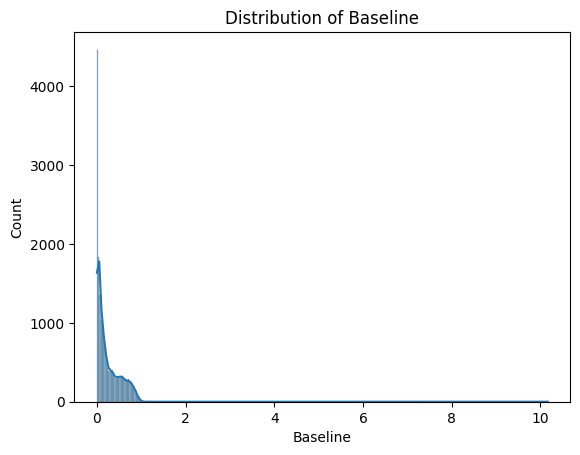

In [34]:
# Distribution plots for selected variables
sns.histplot(df_encoded['Baseline'], kde=True)
plt.title('Distribution of Baseline')
plt.show()

**Feature Selection**

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Misalkan X_train adalah DataFrame fitur, dan y_train adalah target
X_train = df_encoded.drop('Baseline', axis=1)  # Menghilangkan kolom target
y_train = df_encoded['Baseline']

# Mendefinisikan model
model = RandomForestRegressor()

# Melatih model
model.fit(X_train, y_train)

# Mendapatkan feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Menampilkan feature importances
sorted_importances = sorted(zip(importances, feature_names), reverse=True)
for importance, name in sorted_importances:
    print(f"{name}: {importance:.4f}")


Time: 0.2485
humidity: 0.2017
Solar Zenith Angle: 0.1486
sunHour: 0.0761
sunset: 0.0582
cloudcover: 0.0260
precipMM: 0.0234
DNI: 0.0206
totalSnow_cm: 0.0159
Clearsky GHI: 0.0135
Surface Albedo: 0.0127
Relative Humidity: 0.0109
Cloud Type: 0.0109
sunrise: 0.0101
moonset: 0.0082
Wind Speed: 0.0082
Dew Point: 0.0079
year: 0.0078
winddirDegree: 0.0073
Temperature: 0.0068
moon_illumination: 0.0067
pressure: 0.0054
month: 0.0054
moonrise: 0.0050
maxtempC: 0.0049
DewPointC: 0.0048
WindGustKmph: 0.0046
GHI: 0.0045
windspeedKmph: 0.0044
date: 0.0044
mintempC: 0.0040
Clearsky DHI: 0.0033
tempC: 0.0029
Clearsky DNI: 0.0029
DHI: 0.0026
uvIndex: 0.0024
WindChillC: 0.0022
HeatIndexC: 0.0020
FeelsLikeC: 0.0018
visibility: 0.0013
Pressure: 0.0011


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Asumsikan X_train dan y_train telah didefinisikan sebelumnya
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Mendapatkan feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Menggabungkan feature names dengan importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Mengurutkan fitur berdasarkan importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Menentukan threshold (misalnya 0.01)
threshold = 0.01

# Memisahkan fitur yang baik dan tidak baik
selected_features = feature_importance_df[feature_importance_df['importance'] >= threshold]['feature'].tolist()
non_selected_features = feature_importance_df[feature_importance_df['importance'] < threshold]['feature'].tolist()

# Print fitur yang dipilih dan tidak dipilih
print(f"Selected Features (Good): {selected_features}")
print(f"Non-Selected Features (Not Good): {non_selected_features}")

# Uji performa model hanya dengan fitur yang dipilih
X_train_selected = X_train[selected_features]
scores = cross_val_score(model, X_train_selected, y_train, cv=5)
print(f"Mean CV Score with selected features: {scores.mean()}")


Selected Features (Good): ['Time', 'humidity', 'Solar Zenith Angle', 'sunHour', 'sunset', 'precipMM', 'cloudcover', 'DNI', 'totalSnow_cm', 'sunrise', 'Clearsky GHI', 'Temperature', 'Surface Albedo', 'Cloud Type']
Non-Selected Features (Not Good): ['moon_illumination', 'Wind Speed', 'moonrise', 'winddirDegree', 'Dew Point', 'moonset', 'Relative Humidity', 'pressure', 'year', 'month', 'windspeedKmph', 'date', 'GHI', 'WindGustKmph', 'mintempC', 'DewPointC', 'maxtempC', 'WindChillC', 'Clearsky DHI', 'Clearsky DNI', 'FeelsLikeC', 'DHI', 'visibility', 'uvIndex', 'HeatIndexC', 'tempC', 'Pressure']
Mean CV Score with selected features: 0.7436384143622682


In [38]:
# Drop the features that are not selected
train_data_reduced = df_encoded[selected_features]

# For the test data, if 'Baseline' doesn't exist, do not include it
test_data_reduced = test[selected_features]

In [39]:
train_data_reduced.shape

(18942, 14)

In [40]:
test_data_reduced.shape

(1077, 14)

In [41]:
from sklearn.model_selection import train_test_split
# Split data into feature matrix and target vector
y = df_encoded['Baseline']
X = train_data_reduced

# split data into train / validation sets
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.2,shuffle=False)

**Modelling and Predictions**

In [42]:
# Modelling
from catboost import CatBoostRegressor

reg = CatBoostRegressor(
    learning_rate=0.05,
    n_estimators=1000,
    depth=8,
    l2_leaf_reg=5,
    border_count=128,
    subsample=0.8,
)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        verbose=False)

# Predict and evaluate
y_pred_xgb = reg.predict(X_val)

# Calculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_xgb)
mae = mean_absolute_error(y_val, y_pred_xgb)
r2 = r2_score(y_val, y_pred_xgb)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.009484065285757782
Mean Absolute Error: 0.06387694619551959
R² Score: 0.8607705820209568


Save model

In [43]:
from joblib import dump, load

# # # # # Save model
dump(reg, 'catboost.joblib')

['catboost.joblib']

Prediction

In [44]:
x_test = test_data_reduced.values
x_test.shape

(1077, 14)

In [45]:
y_test = reg.predict(x_test)
y_test

array([ 0.14477139,  0.16998303,  0.23426741, ..., -0.02742901,
       -0.03705562, -0.05317152])

In [46]:
# Save prediction
pd.DataFrame(y_test).to_csv('Answer.csv', index=False, header=False)